In [1]:
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import cm
%matplotlib notebook

import skbeam.core.correlation as corr
import skbeam.core.roi as roi
import skbeam.core.mask as mask

<IPython.core.display.Javascript object>


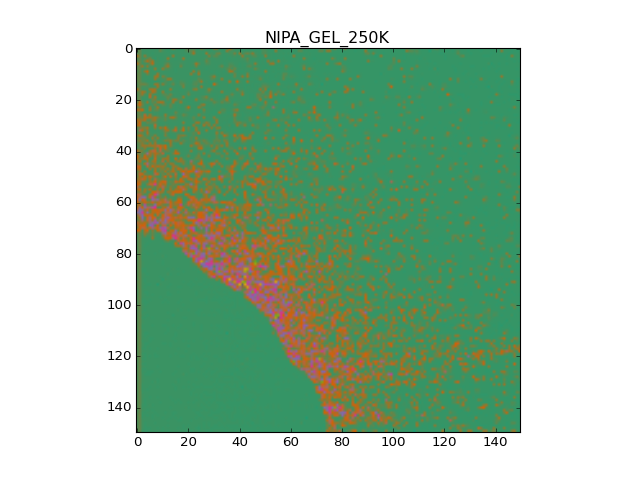

In [59]:
num_levels = 6
num_bufs = 8

# load the data
img_stack = np.load("/Volumes/Data/All_NSLS2/scikit-beam-examples/demos/time_correlation/100_500_NIPA_GEL.npy")
fig, ax = plt.subplots()
# plot the first image to make sure the data loaded correctly
ax.imshow(img_stack[0], cmap="Dark2")
ax.set_title("NIPA_GEL_250K")



In [8]:
# define the ROIs
roi_start = 78 # in pixels
roi_width = 9 # in pixels
#roi_spacing = (5.0, 4.0)
x_center = 7. # in pixels
y_center = (129.) # in pixels
num_rings = 1

# get the edges of the rings
edges = roi.ring_edges(roi_start, width=roi_width, num_rings=num_rings)

# get the label array from the ring shaped 3 region of interests(ROI's)
labeled_roi_array = roi.rings(
    edges, (y_center, x_center), img_stack.shape[1:])

<IPython.core.display.Javascript object>


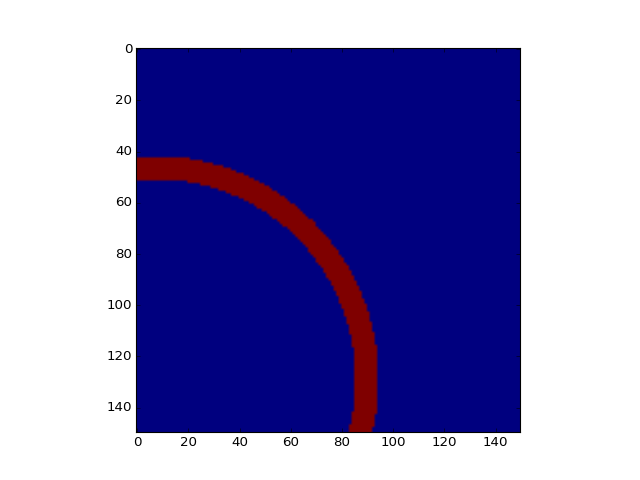

In [10]:
fig, ax = plt.subplots()
ax.imshow(labeled_roi_array)
plt.show()

In [12]:
g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, img_stack)

<IPython.core.display.Javascript object>


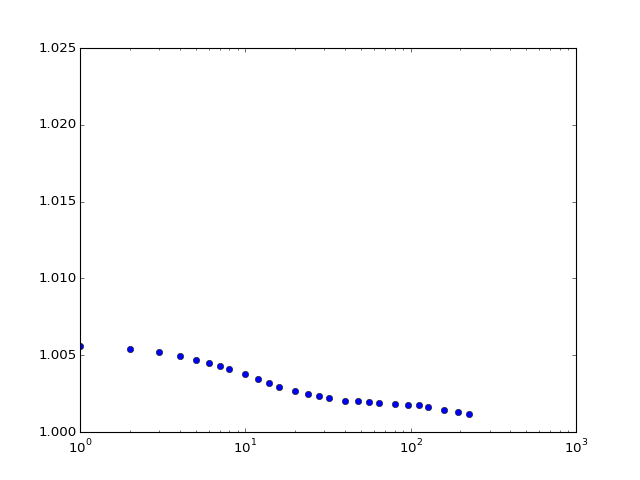

In [15]:
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2[:, 0], "o")
plt.show()

In [60]:
y = []
for i in range(10000):
    y.append(img_stack[0])

In [61]:
g2y, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, np.asarray(y))

<IPython.core.display.Javascript object>


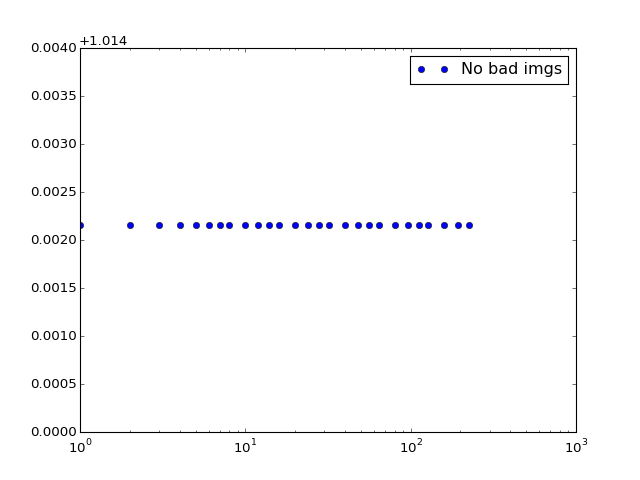

In [122]:
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "o", label="No bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.legend()
plt.show()

In [68]:
bad_list = bad_list = np.random.choice(np.arange(10000), size=10)
bad_list
imgs = mask.bad_to_nan_gen(y, bad_list)

In [70]:
g2_10, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)

<IPython.core.display.Javascript object>


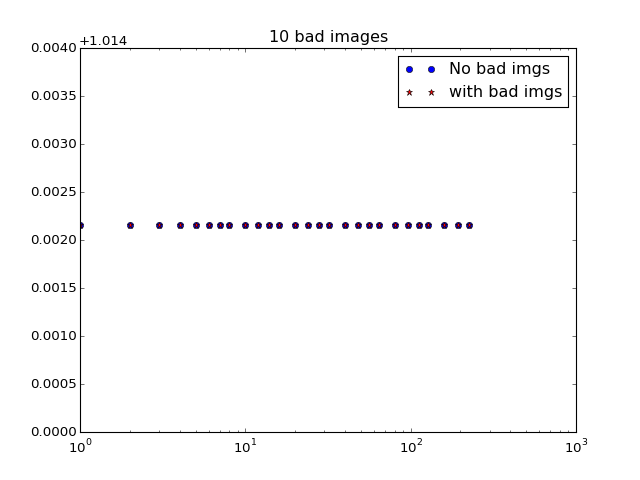

In [133]:
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_10[:, 0], "r*", label="with bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("10 bad images")
ax.legend()
plt.show()

In [83]:
bad_list_3 = np.random.choice(np.arange(10000), size=20)

imgs = mask.bad_to_nan_gen(y, bad_list_3)
bad_list_3

20

In [84]:
g2_20, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)

<IPython.core.display.Javascript object>


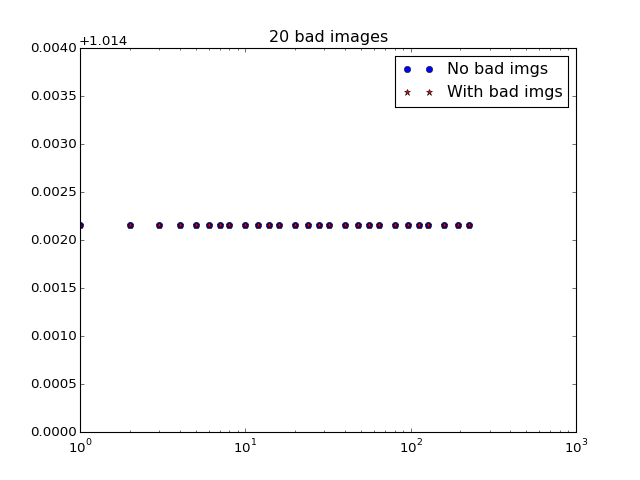

In [134]:
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_20[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("20 bad images")
ax.legend()
plt.show()

In [111]:
bad_list_9 = np.random.choice(np.arange(10000), size=50)
bad_list_9

array([1048, 7210, 8465, 2309,  398, 3523,  958, 4135, 8834, 6923, 7561,
       9184, 7540, 1298, 7070, 3848, 1711, 4669,  112, 1183, 9263, 9797,
       2506, 1627, 5091, 5838, 5503, 6858, 7227, 5981, 5414,  246, 1158,
       9914, 8047, 9032, 3212, 4104, 1664, 9662, 1497, 4704, 8340, 5759,
       5088, 4013, 2132, 5975, 8417, 4625])

<IPython.core.display.Javascript object>


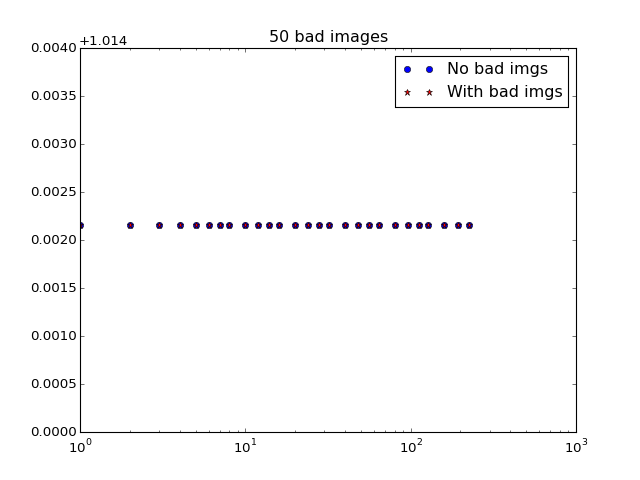

In [135]:
imgs = mask.bad_to_nan_gen(y, bad_list_9)
g2_50, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_50[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("50 bad images")
ax.legend()
plt.show()

In [125]:
bad_list_100 = np.random.choice(np.arange(10000), size=100)
bad_list_100

array([5368, 3311,  151, 1077, 7219, 2895, 5360, 1361, 5629, 9106, 6628,
       6750, 7523, 3083, 2562, 7964, 8799, 4546, 2319,  450, 2651, 5393,
       6298, 4232, 5379, 2603,  237, 6575, 5760, 9515, 7279, 6456, 6037,
       1098, 4979, 3357, 2506, 9064, 7987, 8617, 1420, 5980,  389,  692,
       6037, 8229, 4055, 1530, 7294, 2116, 7195, 7240, 6398, 6421, 7835,
       2143, 9509, 6212, 3751, 1743, 4936, 3579, 4358, 3573, 1823, 4694,
       8638, 7044,  226, 1256, 9241, 7925, 6605, 2317, 2335, 4222, 1444,
       5306, 7668, 2010, 2460, 6589,  760, 5216, 3221, 4786,  343, 9461,
       7445, 2933, 8066,  986, 3528,  235, 1873, 3962, 2590, 9355, 7022,
       4458])

<IPython.core.display.Javascript object>


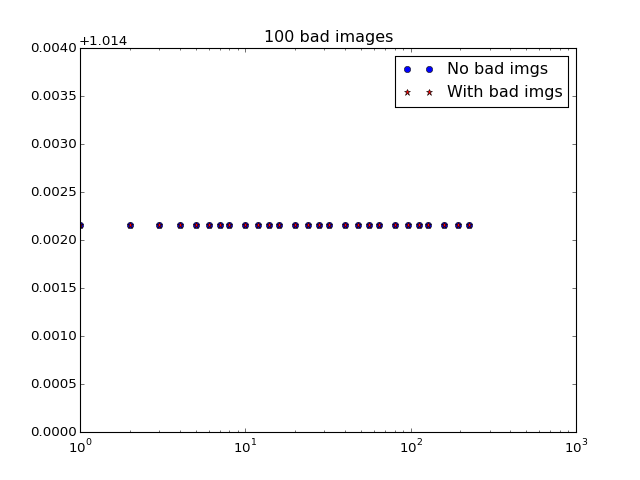

In [129]:
imgs = mask.bad_to_nan_gen(y, bad_list_10)
g2_100, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_100[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("100 bad images")
ax.legend()
plt.show()

In [131]:
bad_list_200 = np.random.choice(np.arange(10000), size=200)
bad_list_200

array([2096,  113,  728,  400, 1523, 5633, 5456, 7833, 9219, 3381, 6665,
       7302, 9938, 8902, 3913, 3094, 6524, 2173, 5607, 6915,  194, 5581,
       2163, 5949,  129, 6396, 7266, 3625,  808, 9486, 5488,  816, 4063,
       1055, 9683, 5857, 1105, 7572, 8066, 9231, 2254, 5364,   21, 5789,
        831,  281, 2537, 5096, 4378, 6960,  749, 1529, 1468, 5259, 8560,
       9245, 1159, 3548, 3609, 2597, 3928, 6010, 2985, 8092, 2248, 1072,
       2391, 4915, 7626, 2789, 6616, 8396, 7225,  952, 9941, 7622, 2323,
       5610, 5113, 2577, 7843, 7603, 9414, 6952, 8843, 7680, 4119, 4705,
        423, 9364, 7776, 7653, 2205, 6796, 3243, 1752, 6874, 6399, 2598,
        686, 4173, 1802, 1793, 1713,  632, 6794, 5614,  478, 8446, 7202,
       1933, 5263, 3579,  801, 7594, 9137, 2757, 6837, 1932, 4702, 2279,
       6459,   46,  304, 4038, 9668,  703, 7207, 1446, 7234, 9681, 5706,
       8668, 8715, 1822, 4226, 3355, 6201, 7424, 5938, 4969, 3072, 5851,
       7564, 7317, 2673, 9761, 3178, 5474, 5473, 15

<IPython.core.display.Javascript object>


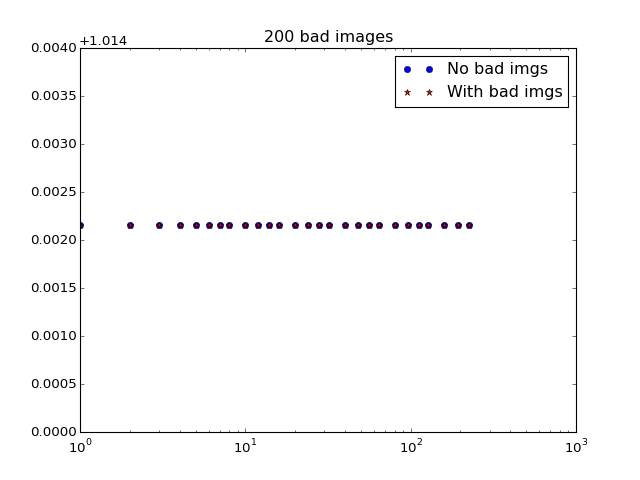

In [132]:
imgs = mask.bad_to_nan_gen(y, bad_list_200)
g2_200, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_200[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("200 bad images")
ax.legend()
plt.show()

In [136]:
bad_list_300 = np.random.choice(np.arange(10000), size=300)
bad_list_300

array([7228, 3420, 1882, 5092, 5313, 1879, 6696, 1700, 9249, 3608,  661,
       1841, 5805, 5190, 1441, 1015, 5018, 3194, 4631, 5463, 8919, 3348,
       7228, 6026, 6885, 8667, 6583, 2685, 1868, 4450, 2652, 8092, 9350,
       4907, 8933, 4181, 3087, 3191, 2440, 4004, 5934, 1668, 9204, 4798,
       2244, 9255, 8084, 4590, 1123, 1298, 3173, 6385, 7479, 4973, 9798,
       9916,   22, 1233,  294, 1971, 4050, 7358, 6587, 6903, 7595, 2428,
       7567, 5628, 7281, 4009, 5371, 2731, 5261, 7841, 4155, 9047, 9055,
       5797, 6938, 6660, 3999, 9594, 5238, 1445,  163, 2658, 1809, 1137,
       2984, 3801,  684, 6139, 1045, 9883, 5767, 6298, 1713, 4808, 6503,
       1140, 1595,  615,  456, 2129,  615, 6688, 7895, 9513, 4765, 7468,
       9559, 6308, 4087,  239, 4447, 2826, 6341, 7969, 7873, 2774, 3513,
        888, 6718, 4533, 7144, 4018, 4733, 2241, 1528, 7657, 6946, 7523,
        469, 7164, 1923, 3404, 2112, 1976, 8867,  525, 2441, 8999, 7268,
       8569, 6671, 6477, 6397, 9379, 6804, 9510, 52

<IPython.core.display.Javascript object>


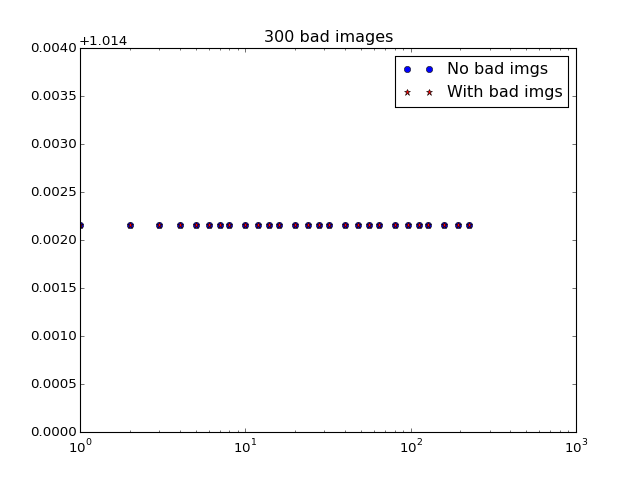

In [137]:
imgs = mask.bad_to_nan_gen(y, bad_list_300)
g2_300, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_300[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("300 bad images")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


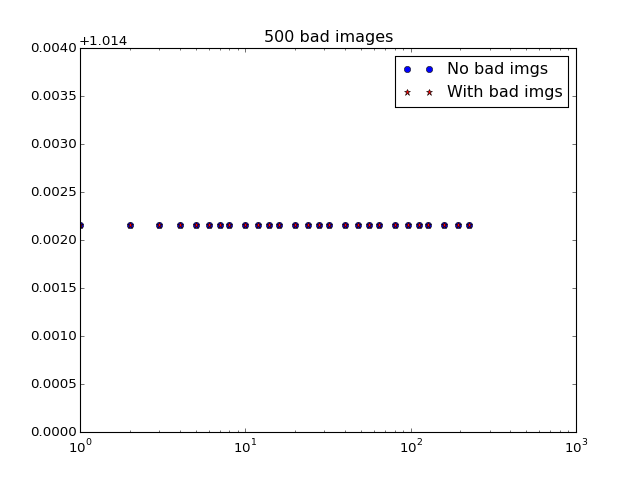

In [138]:
bad_list_500 = np.random.choice(np.arange(10000), size=500)
imgs = mask.bad_to_nan_gen(y, bad_list_500)
g2_500, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_500[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("500 bad images")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


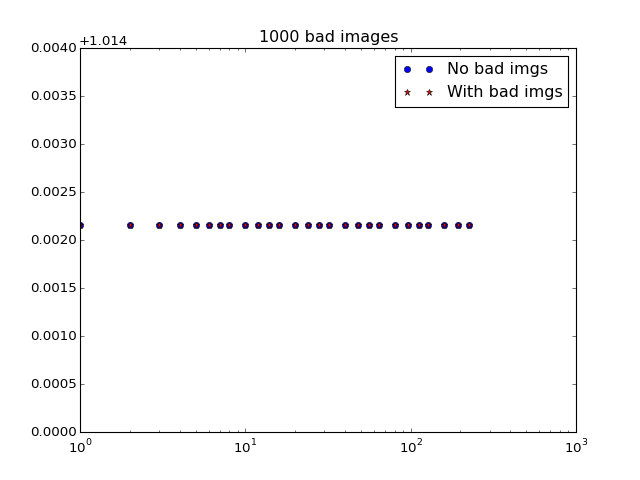

In [140]:
bad_list_1000 = np.random.choice(np.arange(10000), size=1000)
imgs = mask.bad_to_nan_gen(y, bad_list_1000)
g2_1000, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_1000[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("1000 bad images")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


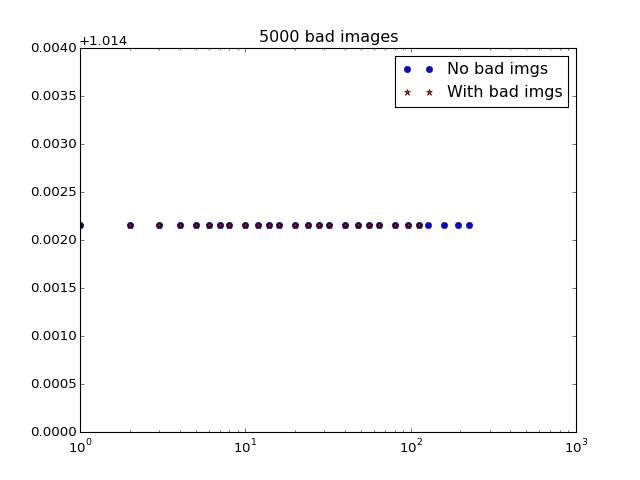

In [144]:
bad_list_2000 = np.random.choice(np.arange(10000), size=2000)
imgs = mask.bad_to_nan_gen(y, bad_list_2000)
g2_2000, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps_n, g2_2000[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("5000 bad images")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


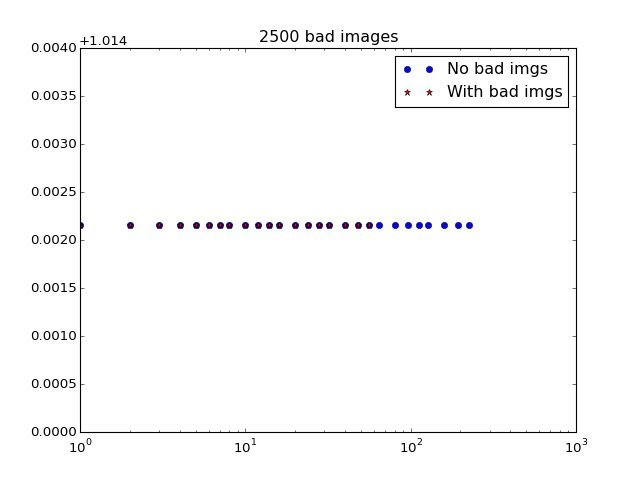

In [143]:
bad_list_2500 = np.random.choice(np.arange(10000), size=2500)
imgs = mask.bad_to_nan_gen(y, bad_list_2500)
g2_2500, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps_n, g2_2500[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("2500 bad images")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


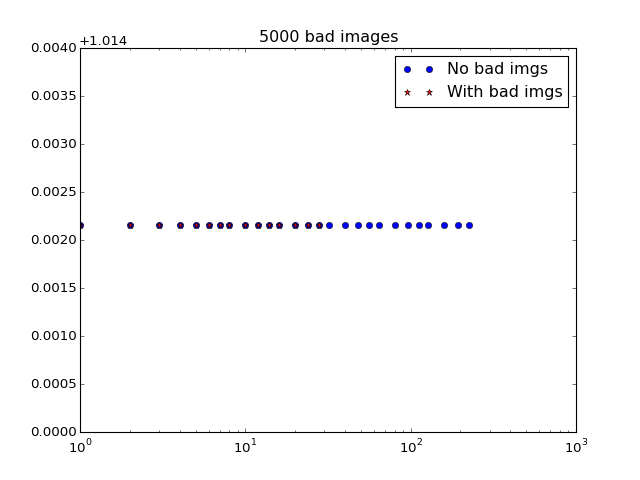

In [142]:
bad_list_5000 = np.random.choice(np.arange(10000), size=5000)
imgs = mask.bad_to_nan_gen(y, bad_list_5000)
g2_5000, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps_n, g2_5000[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("5000 bad images")
ax.legend()
plt.show()